# 라이브러리 임포트

In [ ]:
### 한글 설치 -> 실행 후 런타임 다시 시작 -> 아래 셀부터 실행
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [51]:
import os
os.chdir("/content/drive/MyDrive/MC_KDT/프로젝트/파이널프로젝트")

In [1]:
### 필요한 라이브러리 임폴트
import pandas as pd
import numpy as np

## 데이터 불러오기

In [50]:
dong = pd.read_csv("/content/drive/MyDrive/MC_KDT/프로젝트/파이널프로젝트/데이터/240306_신촌동_분기별.csv")
dong = dong.rename(columns={'총_매출_금액':"신촌동_총_매출금액", '분기당_매출_금액':"신촌동_분기당_매출금액"})
dong.head()

,date,신촌동_총_매출금액,신촌동_분기당_매출금액
0,2017-01,247542627455,247542627455
1,2017-04,260364945004,260364945004
2,2017-07,252003813436,252003813436
3,2017-10,248283813172,248283813172
4,2018-01,234355813901,234355813901


In [75]:
df = pd.read_csv('/content/drive/MyDrive/MC_KDT/프로젝트/파이널프로젝트/데이터/0802_신촌_한식음식점.csv', encoding='cp949', parse_dates=True)
df.head(3)

,date,기준_년_코드,기준_분기_코드,총_점포수,점포_수,개업_점포_수,폐업_점포_수,프랜차이즈_점포_수,총_매출_금액,분기당_매출_금액,주중_매출_금액,주말_매출_금액,남성_매출_금액,여성_매출_금액
0,2017-01,2017,1,540,470,11,20,70,34974328196,34974328196,24827752559,10146575637,16800873792,13184344000
1,2017-04,2017,2,535,469,16,21,66,35821251882,35821251882,25052051032,10769200850,16724180268,13984075273
2,2017-07,2017,3,529,465,14,20,64,34372357455,34372357455,23824413320,10547944135,15982890369,13292445563


In [52]:
df = pd.merge(dong, df, on='date', how='inner')
df.head()

,date,신촌동_총_매출금액,신촌동_분기당_매출금액,기준_년_코드,기준_분기_코드,총_점포수,점포_수,개업_점포_수,폐업_점포_수,프랜차이즈_점포_수,총_매출_금액,분기당_매출_금액,주중_매출_금액,주말_매출_금액,남성_매출_금액,여성_매출_금액
0,2017-01,247542627455,247542627455,2017,1,540,470,11,20,70,34974328196,34974328196,24827752559,10146575637,16800873792,13184344000
1,2017-04,260364945004,260364945004,2017,2,535,469,16,21,66,35821251882,35821251882,25052051032,10769200850,16724180268,13984075273
2,2017-07,252003813436,252003813436,2017,3,529,465,14,20,64,34372357455,34372357455,23824413320,10547944135,15982890369,13292445563
3,2017-10,248283813172,248283813172,2017,4,519,454,14,24,65,37190081157,37190081157,25401224024,11788857133,16975991400,14235261453
4,2018-01,234355813901,234355813901,2018,1,512,451,11,18,61,34866478691,34866478691,24404946086,10461532605,16565172666,13182847477


In [53]:
df['순점포증감률'] = ((df['개업_점포_수'] - df['폐업_점포_수']) / df['총_점포수']) * 100
df['시장성'] = (df['신촌동_분기당_매출금액'] / df['총_점포수']) / (df['분기당_매출_금액'] / df['점포_수'])
df['성장성'] = (df['분기당_매출_금액'] / df['분기당_매출_금액'].shift(1))
df.head(3)

,date,신촌동_총_매출금액,신촌동_분기당_매출금액,기준_년_코드,기준_분기_코드,총_점포수,점포_수,개업_점포_수,폐업_점포_수,프랜차이즈_점포_수,총_매출_금액,분기당_매출_금액,주중_매출_금액,주말_매출_금액,남성_매출_금액,여성_매출_금액,순점포증감률,시장성,성장성
0,2017-01,247542627455,247542627455,2017,1,540,470,11,20,70,34974328196,34974328196,24827752559,10146575637,16800873792,13184344000,-1.666667,6.160340,NaN
1,2017-04,260364945004,260364945004,2017,2,535,469,16,21,66,35821251882,35821251882,25052051032,10769200850,16724180268,13984075273,-0.934579,6.371781,1.024216
2,2017-07,252003813436,252003813436,2017,3,529,465,14,20,64,34372357455,34372357455,23824413320,10547944135,15982890369,13292445563,-1.134216,6.444587,0.959552


In [ ]:
df = df[['date', '순점포증감률', '시장성', '성장성', '총_매출_금액']]
new_rows = pd.DataFrame({
    'date': ['2023-01', '2023-04', '2023-07', '2023-10'],  # 4개의 새로운 행
})
df = df.append(new_rows)

In [56]:
df = df.reset_index()
df

,index,date,순점포증감률,시장성,성장성,총_매출_금액
0,0,2017-01,-1.666667,6.160340,NaN,3.497433e+10
1,1,2017-04,-0.934579,6.371781,1.024216,3.582125e+10
2,2,2017-07,-1.134216,6.444587,0.959552,3.437236e+10
3,3,2017-10,-1.926782,5.839959,1.081976,3.719008e+10
4,4,2018-01,-1.367188,5.920716,0.937521,3.486648e+10
5,5,2018-04,-1.587302,5.784819,1.068881,3.726813e+10
6,6,2018-07,-0.398406,5.677646,0.939329,3.500703e+10
7,7,2018-10,0.594059,5.679936,1.109607,3.884403e+10
8,8,2019-01,-0.597610,5.538491,0.793748,3.083238e+10
9,9,2019-04,0.198807,6.018522,0.910258,2.806542e+10


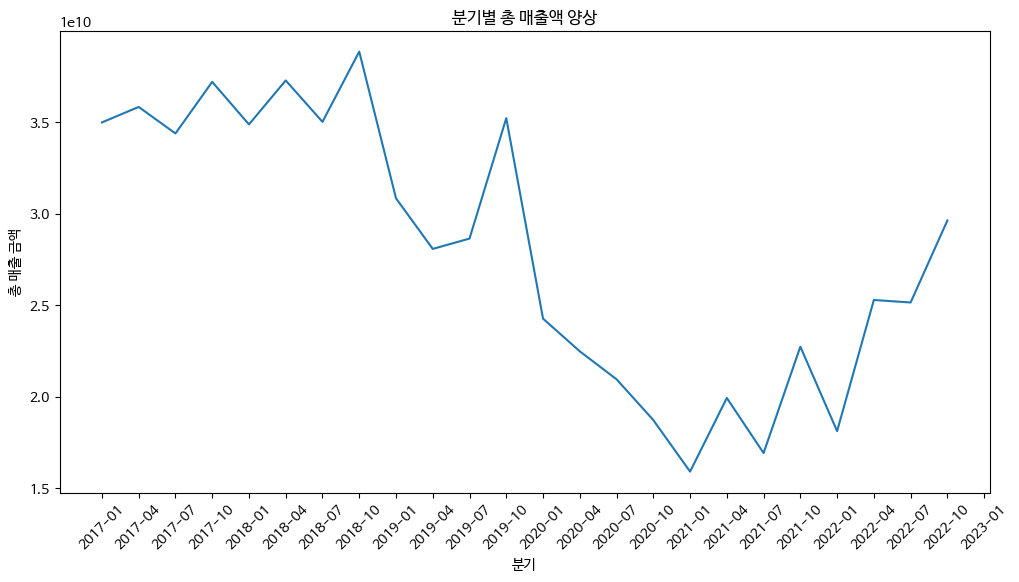

In [58]:
### seaborn lineplot을 이용, 시각화
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

# 시각화
plt.figure(figsize=(12, 6))
sns.lineplot(x=df['date'], y=df['총_매출_금액'])
plt.xticks(rotation=45)
plt.xlabel('분기')
plt.ylabel('총 매출 금액')
plt.title("분기별 총 매출액 양상")
plt.show()

In [27]:
df.columns

Index(['date', '순점포증감률', '시장성', '성장성', '총_매출_금액'], dtype='object')

In [59]:
# df = df.drop(df.index[0])
# df.reset_index()
df.fillna(0, inplace=True)
df

,index,date,순점포증감률,시장성,성장성,총_매출_금액
0,0,2017-01,-1.666667,6.160340,0.000000,3.497433e+10
1,1,2017-04,-0.934579,6.371781,1.024216,3.582125e+10
2,2,2017-07,-1.134216,6.444587,0.959552,3.437236e+10
3,3,2017-10,-1.926782,5.839959,1.081976,3.719008e+10
4,4,2018-01,-1.367188,5.920716,0.937521,3.486648e+10
5,5,2018-04,-1.587302,5.784819,1.068881,3.726813e+10
6,6,2018-07,-0.398406,5.677646,0.939329,3.500703e+10
7,7,2018-10,0.594059,5.679936,1.109607,3.884403e+10
8,8,2019-01,-0.597610,5.538491,0.793748,3.083238e+10
9,9,2019-04,0.198807,6.018522,0.910258,2.806542e+10


In [63]:
### X / y 데이터 생성
X = df.drop(columns=['index', 'date', '총_매출_금액'])
y = df.loc[:,['총_매출_금액']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

      순점포증감률       시장성       성장성
0  -1.666667  6.160340  0.000000
1  -0.934579  6.371781  1.024216
2  -1.134216  6.444587  0.959552
3  -1.926782  5.839959  1.081976
4  -1.367188  5.920716  0.937521
5  -1.587302  5.784819  1.068881
6  -0.398406  5.677646  0.939329
7   0.594059  5.679936  1.109607
8  -0.597610  5.538491  0.793748
9   0.198807  6.018522  0.910258
10 -1.821862  5.905502  1.020132
11  0.000000  5.380117  1.229773
12  0.202020  5.944746  0.688926
13  0.595238  6.277284  0.926429
14 -1.818182  6.066084  0.932056
15 -2.922756  6.613626  0.893598
16  0.208333  6.982851  0.849551
17 -0.208768  6.259258  1.253011
18 -0.420168  6.814327  0.848968
19 -4.166667  5.574266  1.343593
20  1.082251  6.209155  0.796924
21  0.000000  5.372773  1.395605
22 -2.968037  5.499313  0.994572
23 -0.919540  4.903118  1.178176
24  0.000000  0.000000  0.000000
25  0.000000  0.000000  0.000000
26  0.000000  0.000000  0.000000
27  0.000000  0.000000  0.000000
-------------------------------------------

# 정규화

In [64]:
# MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (28, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (28, 1)


In [65]:
# 2분기 기점으로 예측 데이터 생성하는 함수 정의
def make_dataset(X, y, window_size=2):
    X_data = []
    y_data = []
    for start in np.arange(len(X) - window_size):
        stop = start + window_size
        X_data.append(X[start:stop, :])
        y_data.append(y[stop])
    return np.array(X_data), np.array(y_data)

In [66]:
def make_last_dataset(X, window_size=2):
    X_data_last = []
    for start in np.arange(len(X) - window_size +1):
        stop = start + window_size
        X_data_last.append(X[start:stop, :])
    return X_data_last[-1]

In [67]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')

X_data 데이터의 모양 : (26, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (26, 1)


In [68]:
### 학습용 / 평가용 데이터 생성

'''
# TEST_SIZE 설정
   (1) TEST_SIZE = 4으로 설정
   (2) TEST_SIZE = 4은 가장 최근 4분기의 데이터로 모델이 주가를 예측
   (3) 학습은 과거부터 최근 4분기 이전의 데이터를 학습
'''

## 학습용 / 평가용 데이터로 분할

# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# # 결과 확인
# print(f'학습용 데이터의 모양 : {X_train.shape}')
# print(f'학습용 레이블의 모양 : {y_train.shape}')
# print('='*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('='*80)
# print(f'평가용 데이터의 모양 : {X_test.shape}')
# print(f'평가용 레이블의 모양 : {y_test.shape}')

# # 결과 확인
# print(f'X_train의 모양 : {X_train.shape}')
# print(f'y_train의 모양 : {y_train.shape}')
# print('='*80)
# print(f'X_test의 모양 : {X_test.shape}')
# print(f'y_test의 모양 : {y_test.shape}')

In [69]:
y_test

array([[0.],
       [0.],
       [0.],
       [0.]])

In [70]:
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

[[0.79381443 0.         0.        ]
 [0.79381443 0.         0.        ]]


# 모델 생성

In [71]:
# 필요한 라이브러리 임폴트
import tensorflow as tf
import random
from tensorflow.keras.optimizers import Adam

# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                                return_sequences=True,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.001))

# 모델 확인
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 2, 64)             17408     
                                                                 
 lstm_7 (LSTM)               (None, 32)                12416     
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 29857 (116.63 KB)
Trainable params: 29857 (116.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## 모델 학습

In [72]:
### 모델 학습

# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    epochs=100,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint]
                   )

Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 0.6531
Epoch 1: val_loss improved from inf to 0.28216, saving model to stock_model.h5
1/1 [==============================] - 5s 5s/step - loss: 0.6531 - val_loss: 0.2822
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 0.6275
Epoch 2: val_loss improved from 0.28216 to 0.26487, saving model to stock_model.h5
1/1 [==============================] - 0s 81ms/step - loss: 0.6275 - val_loss: 0.2649
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 0.6022
Epoch 3: val_loss improved from 0.26487 to 0.24785, saving model to stock_model.h5
1/1 [==============================] - 0s 70ms/step - loss: 0.6022 - val_loss: 0.2479
Epoch 4/100


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - ETA: 0s - loss: 0.5769
Epoch 4: val_loss improved from 0.24785 to 0.23108, saving model to stock_model.h5
1/1 [==============================] - 0s 76ms/step - loss: 0.5769 - val_loss: 0.2311
Epoch 5/100
1/1 [==============================] - ETA: 0s - loss: 0.5517
Epoch 5: val_loss improved from 0.23108 to 0.21452, saving model to stock_model.h5
1/1 [==============================] - 0s 68ms/step - loss: 0.5517 - val_loss: 0.2145
Epoch 6/100
1/1 [==============================] - ETA: 0s - loss: 0.5265
Epoch 6: val_loss improved from 0.21452 to 0.19815, saving model to stock_model.h5
1/1 [==============================] - 0s 96ms/step - loss: 0.5265 - val_loss: 0.1982
Epoch 7/100
1/1 [==============================] - ETA: 0s - loss: 0.5012
Epoch 7: val_loss improved from 0.19815 to 0.18198, saving model to stock_model.h5
1/1 [==============================] - 0s 74ms/step - loss: 0.5012 - val_loss: 0.1820
Epoch 8/100
1/1 [=======================

## 예측

In [73]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 804ms/step
[[0.56768864]
 [0.5093273 ]
 [0.29871967]
 [0.29871967]]


## 결과 확인

In [74]:
# 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = df.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
index,,
0,0.0,0.567689
1,0.0,0.509327
2,0.0,0.298720
3,0.0,0.298720


In [26]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = df.iloc[-len(pred):, 1].values
df_test['predict_origin'] = predict_inverse
error = df_test.test_origin - df_test.predict_origin
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
date,,,,,
2022-01,0.096345,0.582109,1.082251,2.925616e+10,-2.925616e+10
2022-04,0.408625,0.528857,0.000000,2.803437e+10,-2.803437e+10
2022-07,0.402645,0.621784,-2.968037,3.016645e+10,-3.016645e+10
2022-10,0.597868,0.585843,-0.919540,2.934183e+10,-2.934183e+10


In [27]:
df_test = df_test.reset_index()
df_test

,date,y_test,predict,test_origin,predict_origin,error
0,2022-01,0.096345,0.582109,1.082251,2.925616e+10,-2.925616e+10
1,2022-04,0.408625,0.528857,0.000000,2.803437e+10,-2.803437e+10
2,2022-07,0.402645,0.621784,-2.968037,3.016645e+10,-3.016645e+10
3,2022-10,0.597868,0.585843,-0.919540,2.934183e+10,-2.934183e+10


### 시각화

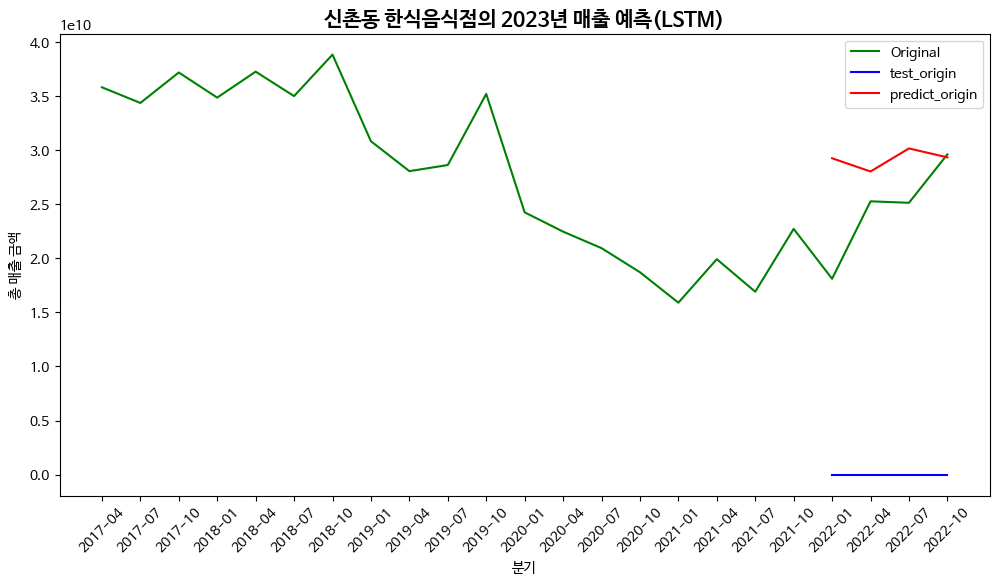

In [29]:
### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['총_매출_금액'], color='green', label = 'Original')
plt.plot(df_test['date'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['date'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('분기')
plt.ylabel('총 매출 금액')
plt.title('신촌동 한식음식점의 2023년 매출 예측(LSTM)', size=15, fontweight='bold')
plt.legend()
plt.show()